In [1]:
import xarray as xr
import numpy as np
import xgcm
import xmitgcm
from matplotlib import pyplot as plt
%matplotlib inline
import os
#plt.rcParams['figure.figsize'] = (12,6)
import glob
from matplotlib import cm

# Figure1

In [2]:
ds = xr.open_dataset('figure1.nc')

In [3]:
eke1     = ds.eke1     
eke3     = ds.eke3     
eke1line = ds.eke1line 
eke3line = ds.eke3line 
u1barline= ds.u1barline
u3barline= ds.u3barline
wpbps1_bt= ds.wpbps1_bt
adv1kbt  = ds.adv1kbt  
eem1kbt  = ds.eem1kbt  
eme1kbt  = ds.eme1kbt  
wpbps3_bt= ds.wpbps3_bt
adv3kbt  = ds.adv3kbt  
eem3kbt  = ds.eem3kbt  
eme3kbt  = ds.eme3kbt  

In [4]:
kiso = wpbps1_bt.freq_XC.values
tt = (ds.time/1e9/86400-19084).values
YY = (ds.YC.values)/1000


start = 0.0
stop = 1.0
number_of_lines=20
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ plt.cm.tab20(x) for x in cm_subsection ]


Text(0.5, 1.0, 'WIND30')

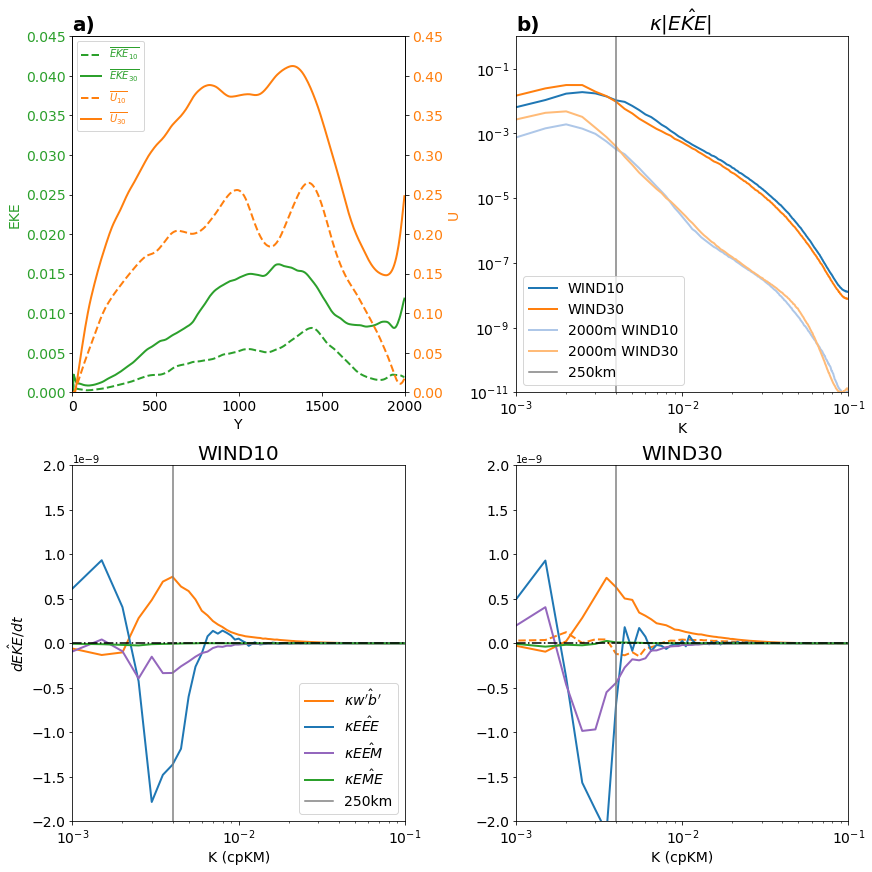

In [6]:

fig,axs=plt.subplots(2,2,figsize=(12,12),constrained_layout=True )

ax=axs[0,1]

ax.plot(kiso*1e3, kiso*eke1[0,100:300].mean('YC') ,label='WIND10',linewidth=2,color=colors[0])
ax.plot(kiso*1e3, kiso*eke3[0,100:300].mean('YC') ,label='WIND30',linewidth=2,color=colors[2])

ax.plot(kiso*1e3, kiso*eke1[39,100:300].mean('YC') ,label='2000m WIND10',linewidth=2,linestyle='-',color=colors[1])
ax.plot(kiso*1e3, kiso*eke3[39,100:300].mean('YC') ,label='2000m WIND30',linewidth=2,linestyle='-',color=colors[3])

ax.tick_params(labelsize=14)

ax.set_xscale('log')
ax.set_yscale('log')

#ax.plot([1/267,1/267],[1e-11,1e0],'-',color='grey',label='267km')
#ax.plot([1/227,1/227],[1e-11,1e0],'--',color='grey',label='227km')
ax.plot([1/250,1/250],[-1,1],'-',color='grey',label='250km')

ax.set_ylim(1e-11,1e0)
ax.set_xlim(1/1e3,1/10)

ax.set_xlabel('K',fontsize=14)
#ax.set_ylabel(r'$\vert \hat {EKE} \vert$',fontsize=12)

ax.legend(fontsize=14)
ax.set_title('b)',loc='left',fontsize=20,fontweight='bold'  )
ax.annotate(r'$ \kappa \vert \hat {EKE} \vert$', (0.4, 1.02), xycoords='axes fraction',fontsize=20)


ax3= axs[0,0]
CS1,=ax3.plot(YY,eke1line ,color=colors[4],linestyle='--',linewidth=2,label=r'$ \overline{EKE_{10}}$' )
CS2,=ax3.plot(YY,eke3line,color=colors[4],linestyle='-',linewidth=2,label=r'$ \overline{EKE_{30}}$' )
par = ax3.twinx()
p2,= par.plot(YY, u1barline  ,color=colors[2], linestyle='--',linewidth=2,label=r'$ \overline{U_{10}}$')
p3,= par.plot(YY, u3barline ,color=colors[2],linestyle='-', linewidth=2,label=r'$ \overline{U_{30}}$')

ax3.tick_params(labelsize=14)
ax3.tick_params(axis='y', labelcolor=colors[4])
ax3.set_xlim(0,2000)
ax3.set_ylim(0,0.045)
par.set_ylim(0,0.45)
par.set_xlim(0,2000)
ax3.set_ylabel('EKE',fontsize=14,color=colors[4])
ax3.set_xlabel('Y',fontsize=14)
par.set_ylabel('U',fontsize=14,color=colors[2])
par.tick_params(labelsize=14)
par.tick_params(axis='y', labelcolor=colors[2])

leg = ax3.legend(loc='upper left',handles=[CS1,CS2,p2,p3])
leg.texts[0].set_color(CS1.get_color())
leg.texts[1].set_color(CS2.get_color())
#leg = par.legend(loc='upper right')
leg.texts[2].set_color(p2.get_color())
leg.texts[3].set_color(p3.get_color())

#ax3.plot([ds1.YC[jS]/1e3,ds1.YC[jS]/1e3],[0,0.045],'k--')
#ax3.plot([ds1.YC[jN]/1e3,ds1.YC[jN]/1e3],[0,0.045],'k--')
ax3.set_title('a)',loc='left',fontsize=20,fontweight='bold'  )


#kiso = advk1.freq_XC[200:].values
ax= axs[1,0]
ax.plot(wpbps1_bt.freq_XC*1e3, wpbps1_bt.freq_XC*(wpbps1_bt[:144].mean('time')) ,label=r'$ \kappa \hat{w^{\prime} b^{\prime}} $',linewidth=2,color=colors[2])

ax.plot(adv1kbt.freq_XC*1e3, adv1kbt.freq_XC*adv1kbt.mean('time'),label=r'$\kappa \hat{EEE}$'+'  ',linewidth=2,color=colors[0])

ax.plot(adv1kbt.freq_XC*1e3, adv1kbt.freq_XC*eem1kbt.mean('time'),label=r'$\kappa \hat{EEM}$'+'  ',linewidth=2,color=colors[8])

ax.plot(adv1kbt.freq_XC*1e3, adv1kbt.freq_XC*eme1kbt.mean('time'),label=r'$\kappa \hat{EME}$'+'  ',linewidth=2,color=colors[4])
#ax.plot(adv1k.freq_XC[200:]*1e3, diss1kbt.freq_XC*( diss1kbt+pres1kbt[:144].mean('time')-wpbps1_bt[:144].mean('time') ),label=r'$\kappa (\hat{UP}+\hat{Diss})$'+'',linewidth=2,color='k',linestyle='-')

ax.tick_params(labelsize=14)

ax.set_xlim(1/1e3,1/10)
ax.set_ylim(-2e-9,2e-9)

ax.plot([1/1e3,1/10],[0,0],'-.',color='k')
ax.set_xscale('log')
ax.set_xlabel('K (cpKM)',fontsize=14)
ax.set_ylabel(r'$d \hat{EKE} / dt}$',fontsize=14)

ax.plot([1/250,1/250],[-1,1],'-',color='grey',label='250km')
#ax.plot([1/267,1/267],[-1,1],'-',color='grey',label='267km')
#ax.plot([1/227,1/227],[-1,1],'--',color='grey',label='227km')
ax.set_title('WIND10',fontsize=20)
ax.legend(fontsize=14,loc='lower right')


ax=axs[1,1]
ax.plot(wpbps3_bt.freq_XC*1e3, wpbps1_bt.freq_XC*(wpbps3_bt[:144].mean('time')) ,label=r'$ \kappa $'+ 'w\'b\' WIND30-WIND10',linewidth=2,color=colors[2])
ax.plot(wpbps3_bt.freq_XC*1e3, wpbps1_bt.freq_XC*(wpbps3_bt[:144].mean('time')-wpbps1_bt[:144].mean('time')) ,label=r'$ \kappa $'+ 'w\'b\' WIND30-WIND10',linewidth=2,color=colors[2],linestyle='--')

ax.plot(adv1kbt.freq_XC*1e3, adv1kbt.freq_XC*(adv3kbt.mean('time')),label=r'$\kappa EEE$'+' WIND30-WIND10',linewidth=2,color=colors[0])
ax.plot(adv1kbt.freq_XC*1e3, adv1kbt.freq_XC*(eem3kbt.mean('time')),label=r'$\kappa EEM$'+' WIND30-WIND10',linewidth=2,color=colors[8])
ax.plot(adv1kbt.freq_XC*1e3, adv1kbt.freq_XC*(eme3kbt.mean('time')),label=r'$\kappa EME$'+' WIND30-WIND10',linewidth=2,color=colors[4])
#ax.plot(adv1k.freq_XC[200:]*1e3, diss1kbt.freq_XC*( diss3kbt+pres3kbt[:144].mean('time')-wpbps3_bt[:144].mean('time') ),label=r'$\kappa Diss$'+'',linewidth=2,color='k',linestyle='-')

ax.tick_params(labelsize=14)
ax.set_xlim(1/1e3,1/10)
ax.set_ylim(-2e-9,2e-9)
ax.plot([1/1e3,1/10],[0,0],'-.',color='k')
ax.set_xscale('log')
ax.set_xlabel('K (cpKM)',fontsize=14)
ax.plot([1/250,1/250],[-1,1],'-',color='grey',label='250km')
#ax.plot([1/227,1/227],[-1,1],'--',color='grey',label='227km')
ax.set_title('WIND30',fontsize=20)


fig.savefig( './figs/fig1.png',dpi=1000  )
fig.savefig( './figs/fig1.jpg',dpi=1000  )

# Figure2

In [2]:
ds = xr.open_dataset('figure2.nc')

In [3]:
VCk1 = ds.VCk1
VCk3 = ds.VCk3
VVk1 = ds.VVk1
VVk3 = ds.VVk3
WCk1 = ds.WCk1
WCk3 = ds.WCk3

/data/home/liuran/python3/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


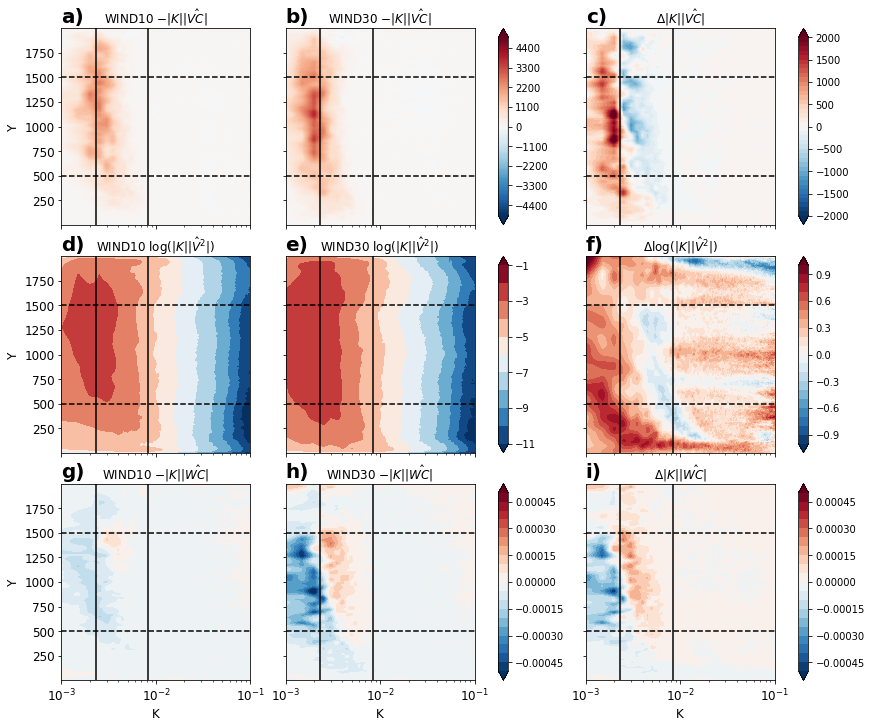

In [11]:
fig, axs = plt.subplots(3,3, sharex=True, sharey=True,figsize=(12,10),constrained_layout=True)

ax1 = axs[0,0]
CS1=ax1.contourf(VCk3.freq_XC*1000,VCk3.YC/1e3, -VCk1*VCk3.freq_XC,levels=np.arange(-5e3,5.1e3,0.1e3), cmap='RdBu_r',extend='both')
#CS1=ax1.contourf(VCs3.freq_XC[200:]*1000,yy, vck,levels=np.arange(-1.6e-3,0,0.1e-3), cmap='RdBu',extend='both')

ax1.plot()
ax1.tick_params(labelsize=12)
ax1.set_xscale('log')
ax1.set_xlim([1/1000,1/10])
#ax1.set_xlabel('K',fontsize=12)
ax1.set_ylabel('Y',fontsize=12)   
ax1.set_title('WIND10 '+r'$ -\vert K \vert \vert  \hat {VC} \vert  $',fontsize=12)   
#fig.colorbar(CS1,ax=ax1)
#ax1.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax1.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax1.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax1.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax1.set_title('a)',loc='left',fontsize=20,fontweight='bold'  )


ax2 = axs[0,1]
CS2=ax2.contourf(VCk3.freq_XC*1000,VCk3.YC/1e3, -VCk3*VCk3.freq_XC,levels=np.arange(-5e3,5.1e3,0.1e3), cmap='RdBu_r',extend='both')
#CS2=ax2.contourf(VCs3.freq_XC[200:]*1000,yy,vc3k,levels=np.arange(-1.6e-3,0,0.1e-3), cmap='RdBu',extend='both')

ax2.tick_params(labelsize=12)
ax2.set_xscale('log')
ax2.set_xlim([1/1000,1/10])
#ax2.set_xlabel('K',fontsize=12)
#ax2.set_ylabel('Y',fontsize=12)   
ax2.set_title('WIND30 '+r'$ -\vert K \vert \vert  \hat {VC} \vert  $',fontsize=12)   
fig.colorbar(CS2,ax=ax2)
#ax2.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax2.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax2.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax2.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax2.set_title('b)',loc='left',fontsize=20,fontweight='bold'  )


ax5 = axs[0,2]
CS5=ax5.contourf(VCk3.freq_XC*1000,VCk3.YC/1e3, VCk1*VCk1.freq_XC-VCk3*VCk3.freq_XC,levels=np.arange(-2e3,2.1e3,0.1e3), cmap='RdBu_r',extend='both')
ax5.tick_params(labelsize=12)
ax5.set_xscale('log')
ax5.set_xlim([1/1000,1/10])
#ax5.set_xlabel('K',fontsize=12)
#ax5.set_ylabel('Y',fontsize=12)   
ax5.set_title(r'$ \Delta \vert K \vert \vert  \hat {VC} \vert $',fontsize=12)   
fig.colorbar(CS5,ax=ax5)
#ax5.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax5.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax5.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax5.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax5.set_title('c)',loc='left',fontsize=20,fontweight='bold'  )



ax3 = axs[1,0]
CS3=ax3.contourf(VVk1.freq_XC*1000,VVk1.YC/1e3,np.log10(VVk1*VVk1.freq_XC),levels=np.arange(-11,0,1), cmap='RdBu_r',extend='both')
ax3.tick_params(labelsize=12)
ax3.set_xscale('log')
ax3.set_xlim([1/1000,1/10])
#ax3.set_xlabel('K',fontsize=12)
#ax3.set_ylabel('Y',fontsize=12)   
ax3.set_title('WIND10 '+ r'$ \log ( \vert K \vert \vert  \hat V^2 \vert ) $',fontsize=12)   
#fig.colorbar(CS1,ax=ax1)
#ax3.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax3.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax3.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax3.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax3.set_title('d)',loc='left',fontsize=20,fontweight='bold'  )


ax4 = axs[1,1]
CS4=ax4.contourf(VVk1.freq_XC*1000,VVk1.YC/1e3,np.log10(VVk3*VVk1.freq_XC),levels=np.arange(-11,0,1), cmap='RdBu_r',extend='both')
ax4.tick_params(labelsize=12)
ax4.set_xscale('log')
ax4.set_xlim([1/1000,1/10])
#ax4.set_xlabel('K',fontsize=12)
#ax4.set_ylabel('Y',fontsize=12)   
ax4.set_title('WIND30 '+ r'$ \log ( \vert K \vert \vert  \hat V^2 \vert ) $',fontsize=12)   
fig.colorbar(CS4,ax=ax4)
#ax4.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax4.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax4.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax4.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax4.set_title('e)',loc='left',fontsize=20,fontweight='bold'  )


ax6 = axs[1,2]
CS6=ax6.contourf(VVk3.freq_XC*1000,VVk1.YC/1e3,np.log10(VVk3*VVk1.freq_XC)-np.log10(VVk1*VVk1.freq_XC),levels=np.arange(-1.,1.1,0.1), cmap='RdBu_r',extend='both')

ax6.tick_params(labelsize=12)
ax6.set_xscale('log')
ax6.set_xlim([1/1000,1/10])
#ax6.set_xlabel('K',fontsize=12)
#ax6.set_ylabel('Y',fontsize=12)   
ax6.set_title( r'$ \Delta \log ( \vert K \vert \vert  \hat V^2 \vert ) $',fontsize=12)   
fig.colorbar(CS6,ax=ax6)
#ax6.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax6.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax6.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax6.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax6.set_title('f)',loc='left',fontsize=20,fontweight='bold'  )

#ax3.set_xlabel('K',fontsize=12)
ax3.set_ylabel('Y',fontsize=12)   
#ax4.set_xlabel('K',fontsize=12)
#ax4.set_ylabel('Y',fontsize=12)   
#ax6.set_xlabel('K',fontsize=12)

ax3 = axs[2,0]
CS3=ax3.contourf(VVk1.freq_XC*1000,VVk1.YC/1e3,-WCk1*VVk1.freq_XC,levels=np.arange(-5e-4,5.5e-4,0.5e-4)[0:-1], cmap='RdBu_r',extend='both')
ax3.tick_params(labelsize=12)
ax3.set_xscale('log')
ax3.set_xlim([1/1000,1/10])
#ax3.set_xlabel('K',fontsize=12)
#ax3.set_ylabel('Y',fontsize=12)   
ax3.set_title('WIND10 '+ r'$ -\vert K \vert \vert  \hat {WC} \vert  $',fontsize=12)   
#fig.colorbar(CS1,ax=ax1)
#ax3.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax3.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax3.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax3.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax3.set_title('g)',loc='left',fontsize=20,fontweight='bold'  )


ax4 = axs[2,1]
CS4=ax4.contourf(VVk1.freq_XC*1000,VVk1.YC/1e3,-WCk3*VVk1.freq_XC,levels=np.arange(-5e-4,5.5e-4,0.5e-4)[0:-1], cmap='RdBu_r',extend='both')
ax4.tick_params(labelsize=12)
ax4.set_xscale('log')
ax4.set_xlim([1/1000,1/10])
#ax4.set_xlabel('K',fontsize=12)
#ax4.set_ylabel('Y',fontsize=12)   
ax4.set_title('WIND30 '+ r'$ -\vert K \vert \vert  \hat {WC} \vert  $',fontsize=12)   
fig.colorbar(CS4,ax=ax4)
#ax4.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax4.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax4.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax4.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax4.set_title('h)',loc='left',fontsize=20,fontweight='bold'  )


ax6 = axs[2,2]
CS6=ax6.contourf(VVk3.freq_XC*1000,VVk1.YC/1e3,-WCk3*VVk1.freq_XC+WCk1*VVk1.freq_XC,levels=np.arange(-5e-4,5.5e-4,0.5e-4)[0:-1],cmap='RdBu_r',extend='both')

ax6.tick_params(labelsize=12)
ax6.set_xscale('log')
ax6.set_xlim([1/1000,1/10])
#ax6.set_xlabel('K',fontsize=12)
#ax6.set_ylabel('Y',fontsize=12)   
ax6.set_title( r'$ \Delta \vert K \vert \vert  \hat {WC} \vert  $',fontsize=12)   
fig.colorbar(CS6,ax=ax6)
#ax6.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax6.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax6.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax6.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax6.set_title('i)',loc='left',fontsize=20,fontweight='bold'  )

ax3.set_xlabel('K',fontsize=12)
ax3.set_ylabel('Y',fontsize=12)   
ax4.set_xlabel('K',fontsize=12)
#ax4.set_ylabel('Y',fontsize=12)   
ax6.set_xlabel('K',fontsize=12)

for i in range(3):
    for j in range(3):
        axs[i,j].plot([1/1e3,1/10],[500,500],'k--')
        axs[i,j].plot([1/1e3,1/10],[1500,1500],'k--')

fig.savefig( './figs/fig2.png',dpi=1000  )
fig.savefig( './figs/fig2.jpg',dpi=1000  )

# Figure3

In [4]:
ds = xr.open_dataset('figure3.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:     (YC: 400, freq_XC199: 199, freq_XC: 200)
Coordinates:
  * YC          (YC) float32 2.5e+03 7.5e+03 1.25e+04 ... 1.992e+06 1.998e+06
  * freq_XC     (freq_XC) float64 0.0 5e-07 1e-06 ... 9.85e-05 9.9e-05 9.95e-05
  * freq_XC199  (freq_XC199) float64 5e-07 1e-06 1.5e-06 ... 9.9e-05 9.95e-05
Data variables:
    Dktheory1   (YC, freq_XC199) float64 ...
    Dktheory3   (YC, freq_XC199) float64 ...
    D1_smooth   (YC, freq_XC) float64 ...
    D3_smooth   (YC, freq_XC) float64 ...

In [6]:
Dktheory1=ds.Dktheory1
Dktheory3=ds.Dktheory3
D1_smooth=ds.D1_smooth
D3_smooth=ds.D3_smooth

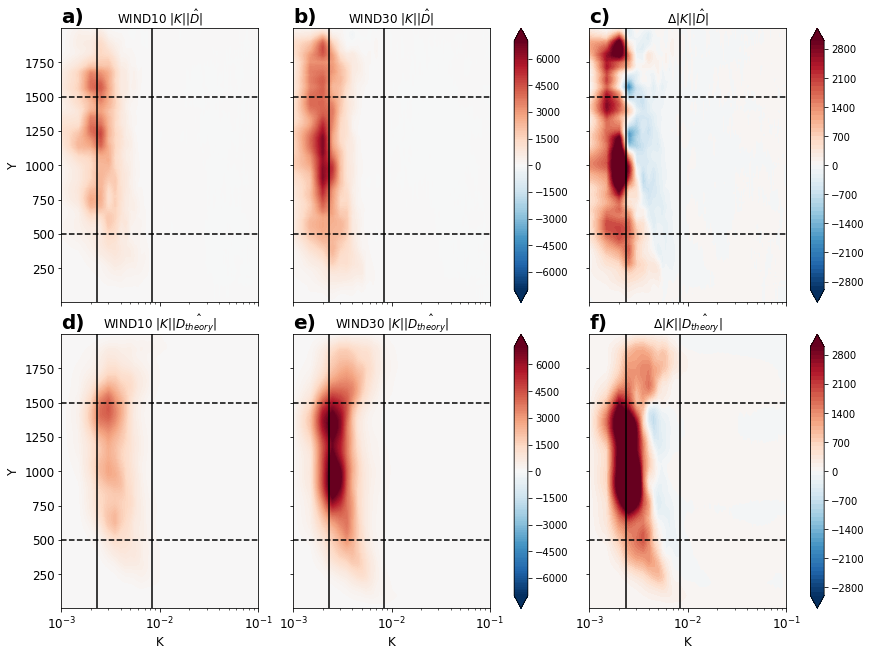

In [8]:

fig, axs = plt.subplots(2,3, sharex=True, sharey=True,figsize=(12,9),constrained_layout=True)

ax1 = axs[0,0]
CS1=ax1.contourf(VCk3.freq_XC*1000,VCk3.YC/1e3, D1_smooth*D1_smooth.freq_XC,levels=np.arange(-7e3,7.1e3,0.1e3), cmap='RdBu_r',extend='both')
#CS1=ax1.contourf(VCs3.freq_XC[200:]*1000,yy, vck,levels=np.arange(-1.6e-3,0,0.1e-3), cmap='RdBu',extend='both')

ax1.plot()
ax1.tick_params(labelsize=12)
ax1.set_xscale('log')
ax1.set_xlim([1/1000,1/10])
#ax1.set_xlabel('K',fontsize=12)
ax1.set_ylabel('Y',fontsize=12)   
ax1.set_title('WIND10 '+r'$ \vert K \vert \vert  \hat {D} \vert  $',fontsize=12)   
#fig.colorbar(CS1,ax=ax1)
#ax1.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax1.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax1.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax1.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax1.set_title('a)',loc='left',fontsize=20,fontweight='bold'  )


ax2 = axs[0,1]
CS2=ax2.contourf(VCk3.freq_XC*1000,VCk3.YC/1e3, D3_smooth*D3_smooth.freq_XC,levels=np.arange(-7e3,7.1e3,0.1e3), cmap='RdBu_r',extend='both')
#CS2=ax2.contourf(VCs3.freq_XC[200:]*1000,yy,vc3k,levels=np.arange(-1.6e-3,0,0.1e-3), cmap='RdBu',extend='both')

ax2.tick_params(labelsize=12)
ax2.set_xscale('log')
ax2.set_xlim([1/1000,1/10])
#ax2.set_xlabel('K',fontsize=12)
#ax2.set_ylabel('Y',fontsize=12)   
ax2.set_title('WIND30 '+r'$ \vert K \vert \vert  \hat {D} \vert  $',fontsize=12)   
fig.colorbar(CS2,ax=ax2)
#ax2.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax2.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax2.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax2.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax2.set_title('b)',loc='left',fontsize=20,fontweight='bold'  )


ax5 = axs[0,2]
CS5=ax5.contourf(VCk3.freq_XC*1000,VCk3.YC/1e3,D3_smooth*D3_smooth.freq_XC-D1_smooth*D1_smooth.freq_XC,levels=np.arange(-3e3,3.1e3,0.1e3), cmap='RdBu_r',extend='both')
ax5.tick_params(labelsize=12)
ax5.set_xscale('log')
ax5.set_xlim([1/1000,1/10])
#ax5.set_xlabel('K',fontsize=12)
#ax5.set_ylabel('Y',fontsize=12)   
ax5.set_title(r'$ \Delta \vert K \vert \vert  \hat {D} \vert $',fontsize=12)   
fig.colorbar(CS5,ax=ax5)
#ax5.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax5.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax5.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax5.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax5.set_title('c)',loc='left',fontsize=20,fontweight='bold'  )


ax3 = axs[1,0]
CS3=ax3.contourf(Dktheory1.freq_XC199*1000,VVk1.YC/1e3,Dktheory1*Dktheory1.freq_XC199*2e6,levels=np.arange(-7e3,7.1e3,0.1e3), cmap='RdBu_r',extend='both')
ax3.tick_params(labelsize=12)
ax3.set_xscale('log')
ax3.set_xlim([1/1000,1/10])
#ax3.set_xlabel('K',fontsize=12)
#ax3.set_ylabel('Y',fontsize=12)   
ax3.set_title('WIND10 '+ r'$  \vert K \vert \vert  \hat {D_{theory}} \vert  $',fontsize=12)   
#fig.colorbar(CS1,ax=ax1)
#ax3.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax3.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax3.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax3.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax3.set_title('d)',loc='left',fontsize=20,fontweight='bold'  )


ax4 = axs[1,1]
CS4=ax4.contourf(Dktheory1.freq_XC199*1000,VVk1.YC/1e3,Dktheory3*Dktheory1.freq_XC199*2e6,levels=np.arange(-7e3,7.1e3,0.1e3), cmap='RdBu_r',extend='both')
ax4.tick_params(labelsize=12)
ax4.set_xscale('log')
ax4.set_xlim([1/1000,1/10])
#ax4.set_xlabel('K',fontsize=12)
#ax4.set_ylabel('Y',fontsize=12)   
ax4.set_title('WIND30 '+ r'$  \vert K \vert \vert  \hat {D_{theory}} \vert  $',fontsize=12)   
fig.colorbar(CS4,ax=ax4)
#ax4.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax4.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax4.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax4.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax4.set_title('e)',loc='left',fontsize=20,fontweight='bold'  )


ax6 = axs[1,2]
CS6=ax6.contourf(Dktheory1.freq_XC199*1000,VVk1.YC/1e3,Dktheory3*Dktheory1.freq_XC199*2e6-Dktheory1*Dktheory1.freq_XC199*2e6,levels=np.arange(-3e3,3.1e3,0.1e3), cmap='RdBu_r',extend='both')

ax6.tick_params(labelsize=12)
ax6.set_xscale('log')
ax6.set_xlim([1/1000,1/10])
#ax6.set_xlabel('K',fontsize=12)
#ax6.set_ylabel('Y',fontsize=12)   
ax6.set_title( r'$ \Delta   \vert K \vert \vert  \hat {D_{theory}} \vert  $',fontsize=12)   
fig.colorbar(CS6,ax=ax6)
#ax6.plot([1/1000,1/10],[VCk3.YC[180]/1e3,VCk3.YC[180]/1e3],'k--')
#ax6.plot([1/1000,1/10],[VCk3.YC[320]/1e3,VCk3.YC[320]/1e3],'k--')
ax6.plot([1/430,1/430],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax6.plot([1/120,1/120],[VCk3.YC[0]/1e3,VCk3.YC[-1]/1e3],'k-')
ax6.set_title('f)',loc='left',fontsize=20,fontweight='bold'  )

ax3.set_xlabel('K',fontsize=12)
ax3.set_ylabel('Y',fontsize=12)   
ax4.set_xlabel('K',fontsize=12)
#ax4.set_ylabel('Y',fontsize=12)   
ax6.set_xlabel('K',fontsize=12)


for i in range(2):
    for j in range(3):
        axs[i,j].plot([1/1e3,1/10],[500,500],'k--')
        axs[i,j].plot([1/1e3,1/10],[1500,1500],'k--')
        

fig.savefig( './figs/fig3.png',dpi=1000  )
fig.savefig( './figs/fig3.jpg',dpi=1000  )